In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')  # Replace with your dataset file

# Inspect the data
print(data.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [38]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39702 entries, 0 to 39701
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    39702 non-null  int64  
 1   V1      39702 non-null  float64
 2   V2      39702 non-null  float64
 3   V3      39702 non-null  float64
 4   V4      39702 non-null  float64
 5   V5      39702 non-null  float64
 6   V6      39702 non-null  float64
 7   V7      39702 non-null  float64
 8   V8      39702 non-null  float64
 9   V9      39702 non-null  float64
 10  V10     39702 non-null  float64
 11  V11     39702 non-null  float64
 12  V12     39702 non-null  float64
 13  V13     39701 non-null  float64
 14  V14     39701 non-null  float64
 15  V15     39701 non-null  float64
 16  V16     39701 non-null  float64
 17  V17     39701 non-null  float64
 18  V18     39701 non-null  float64
 19  V19     39701 non-null  float64
 20  V20     39701 non-null  float64
 21  V21     39701 non-null  float64
 22

In [39]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  39702.000000  39702.000000  39702.000000  39702.000000  39702.000000   
mean   25502.432497     -0.213932      0.051942      0.713780      0.189431   
std    12626.308343      1.831757      1.548373      1.506728      1.399784   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    14678.500000     -0.967117     -0.525207      0.233522     -0.717668   
50%    30598.500000     -0.233669      0.101393      0.818163      0.185015   
75%    35625.000000      1.160708      0.743741      1.447844      1.071347   
max    39929.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  39702.000000  39702.000000  39702.000000  39702.000000  39702.000000   
mean      -0.231083      0.100915     -0.112981      0.041731      0.214179   
std        1.379431      1.304722      1.244260    

In [15]:
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)  # Simple imputation for numerical columns

# Map target variable: Fraud = 1, Not Fraud = 0
data['Class'] = data['Class'].map({0.0: 'Creditworthy', 1.0: 'Not Creditworthy'})

# Features and target variable
X = data.drop(['Class'], axis=1)
y = data['Class']

# Normalize Amount feature separately
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Amount']] = scaler.fit_transform(X[['Amount']])


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Make predictions
y_pred = model.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

Creditworthy       1.00      1.00      1.00      1192

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192



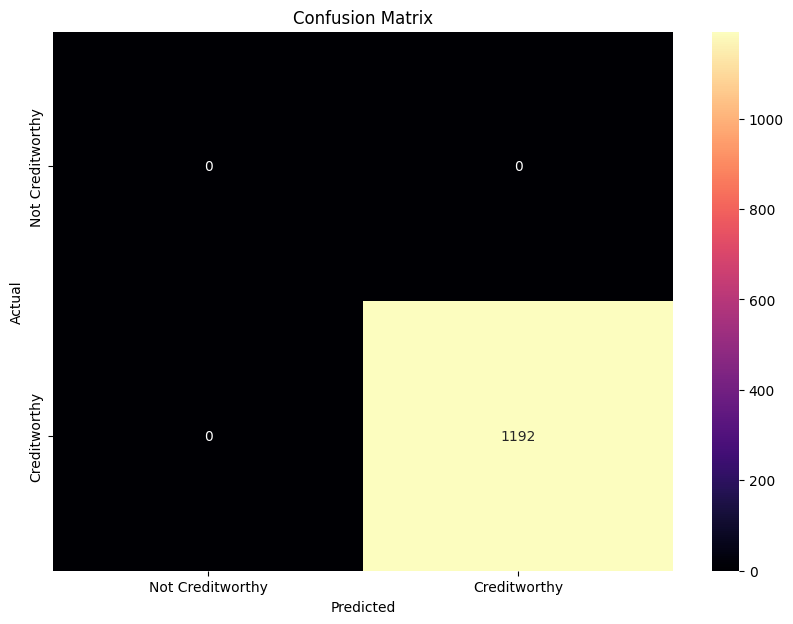

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Not Creditworthy', 'Creditworthy'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma',
            xticklabels=['Not Creditworthy', 'Creditworthy'],
            yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

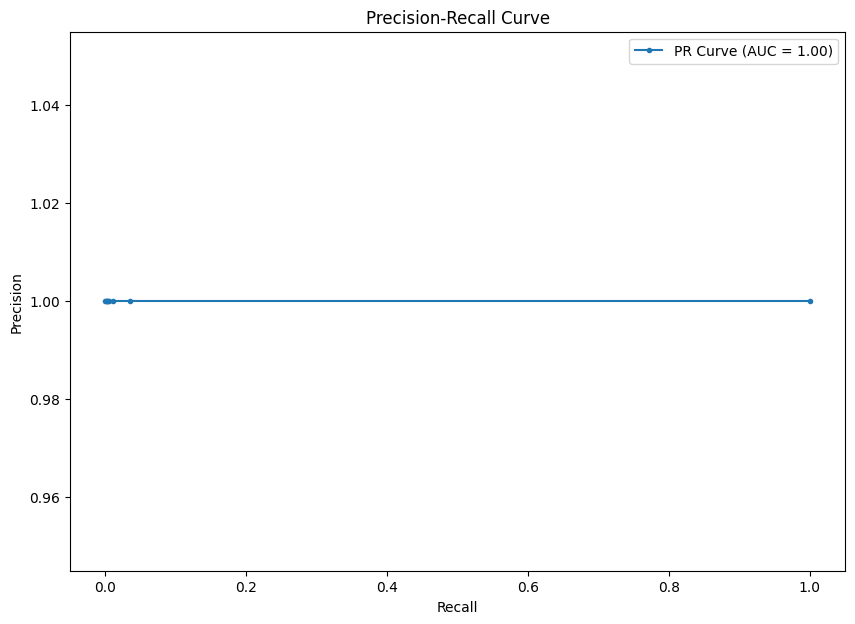

In [22]:
from sklearn.metrics import precision_recall_curve, auc

# Convert target labels to binary for precision-recall calculation
y_test_binary = y_test.map({'Not Creditworthy': 0, 'Creditworthy': 1})
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


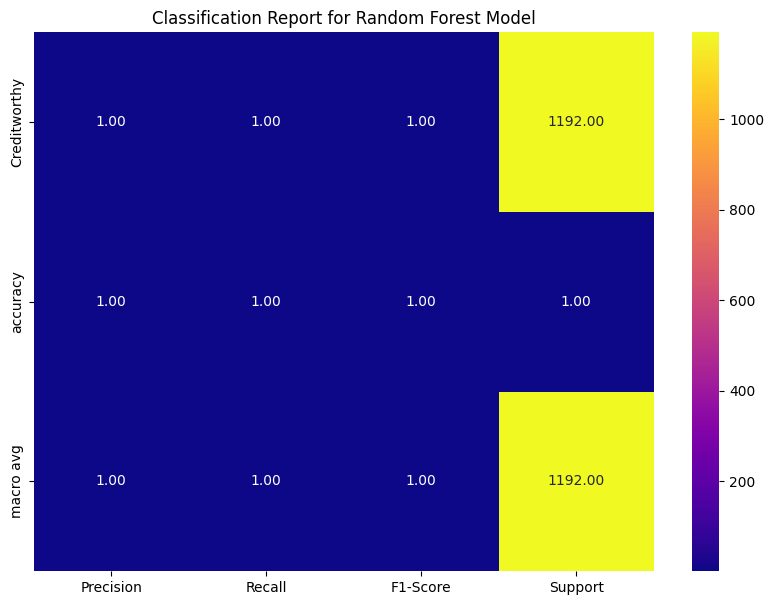

In [32]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='plasma', fmt='.2f',
            xticklabels=['Precision', 'Recall', 'F1-Score', 'Support'])
plt.title('Classification Report for Random Forest Model')
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

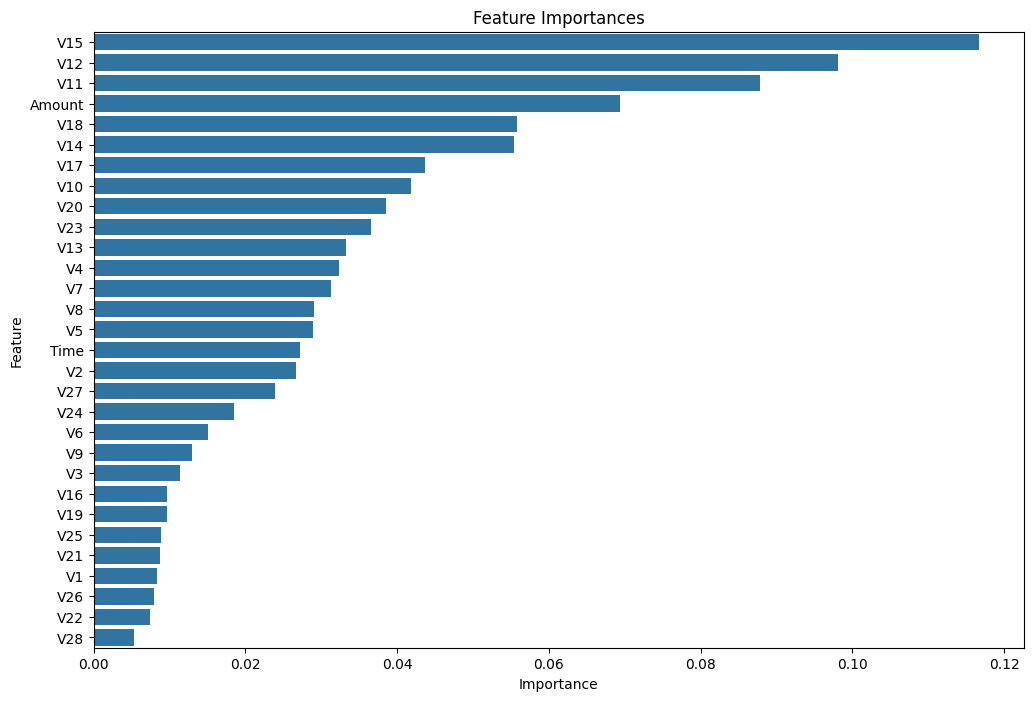

In [25]:
# Plot feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


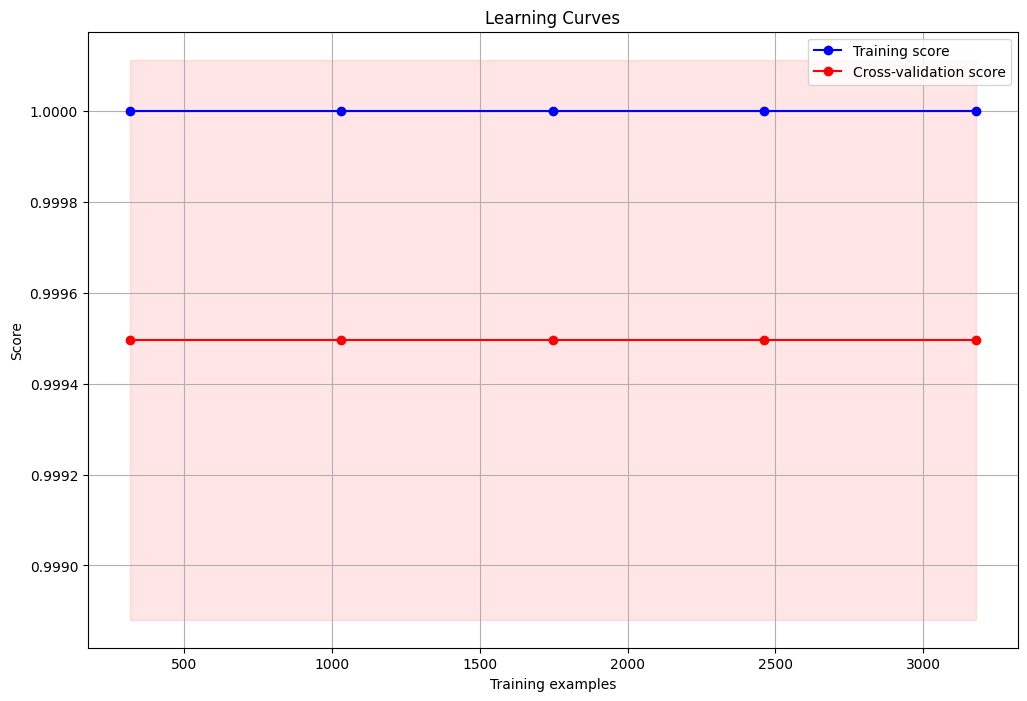

In [26]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y.map({'Not Creditworthy': 0, 'Creditworthy': 1}), cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and std deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid()
plt.show()


In [28]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 100.00%
